# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import sys
sys.path.append('../../src')

In [4]:
from data_config import ProductHandler as ph

d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:13: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:15: DtypeWarning: Columns (5,29,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:18: DtypeWarning: Columns (43,57,106,141,146,211,212,247,255,294,298,316,327,332,350,354) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_inv_adds = pd.read_csv(


----- DROP BOOLEAN AND NULL COLUMNS (NOT NEEDED) -----

Merged Data - Columns to be dropped (Missing Vals): ['BackStage_DefaultReportForm', 'BackStage_SmartMarkSet', 'BillCounty', 'CoreType', 'EndUserNum', 'EndUserPO', 'Equip3_ID', 'Equip3_Status', 'Est_v_Act_Notes', 'Ink_Status', 'JDF_Note_to_DFE', 'JDF_Send_Msg', 'MiscChargeDesc1', 'MiscChargeDesc2', 'MiscChargeDesc3', 'MiscChargeDesc4', 'PlateStat', 'ProofStat', 'Roto_CEL_Product_ID', 'Roto_Quote_Line_ID', 'Roto_Quote_Number', 'Schedule_Status', 'ShipAttn_EmailAddress', 'ShipCounty', 'ShipStat', 'Tag_x', 'Tool3Descr', 'Tool4Descr', 'Tool5Descr', 'ToolNo3', 'ToolNo4', 'ToolNo5', 'ToolStat', 'UserDef_MR_1_Lb', 'UserDef_MR_2_Lb', 'Assigned', 'Desc2_x', 'ediLineNumber', 'eTraxx_Customer_Notes', 'Location_x', 'PO_Number', 'Adhesive', 'Alternate', 'eTraxx_Forecast_Range', 'Material', 'Tag_y', 'UPC']

Merged Data - Columns to be dropped (All cols with rows same vals): ['Act_OTHER_Hours', 'ActArtwork', 'ActFinMaterial', 'ActPostPressHours',

d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:108: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:110: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Ship_

In [5]:
ph.custom_prod_set()

All custom codes for existing products: 
{'940', '965', 'NS-', '45S', '953', 'SI-', '74Y', '140', '517', '19S', 'LZT', '55U', '387', 'BK-', 'QFS', '791', 'TG-', 'FRE', 'L-1', '96T', '951', 'SS-', 'PVM', '964', '311', 'IS-', '551', '38Z', '726', 'O-T', '43S', 'COR', 'SU-', 'US-', '64X', '962', 'W-T', 'EA-', '60V', '978', '021', 'AF-', '159', '14Y', 'GAR', 'URB', '21X', '671', '19U', '17T', 'KAL', 'LOC', '834', '09Y', '35X', '92Y', 'UN-', '237', '88Y', '337', '469', '519', '139', '123', 'KWS', '969', '49Z', '64Y', '618', '43U', 'WI-', '768', '570', '800', '-D3', '720', '239', '621', 'FO-', '748', 'LD-', '158', 'TIP', '-02', '54Y', '45W', '985', '14-', 'NWB', '29Y', '-F2', '35-', '552', '303', '626', '6X-', '983', '416', '526', '26Y', '16X', '80Y', '75X', 'QU-', '08X', '200', '600', '660', '169', '864', '15T', '28S', '190', '11U', '10S', '510', 'WTI', '48W', 'TMC', 'OO-', '060', '887', '50Y', '064', '402', '-01', '85Y', '075', '414', '83Z', '56Y', '410', 'CRA', '18V', '067', 'ORC', '62U',

In [6]:
# # display the highest order quantity customers 
# ph.highest_customs()

In [7]:
from sklearn.model_selection import train_test_split

# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(ph.get_custom_code_data('UND'))

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

UND


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,UND-026-0002Y,2022,1,4,2,0,194.0,30000,40000.00000,40000.00000,...,37333.333333,37000.000000,37000.000000,37000.000000,30000,0,0,-100.0,NaN,0
1,UND-026-0002Y,2022,3,12,1,0,194.0,40000,42000.00000,42000.00000,...,39333.333333,39333.333333,39333.333333,39333.333333,40000,0,0,-100.0,NaN,0
2,UND-026-0002Y,2022,6,23,4,0,194.0,42000,36000.00000,36000.00000,...,39000.000000,39000.000000,39000.000000,39000.000000,42000,0,0,-100.0,NaN,0
3,UND-026-0002Y,2024,7,28,2,0,194.0,36000,110031.53337,110031.53337,...,36000.000000,36000.000000,36000.000000,36000.000000,0,0,36000,NaN,inf,0
4,UND-026-0003Y,2022,3,12,1,0,194.0,10000,10000.00000,10000.00000,...,11333.333333,12666.666667,12666.666667,12666.666667,10000,0,0,-100.0,NaN,0


In [8]:
from scipy import stats

# Define a function to compute z-scores within each product group
def compute_zscore(group, threshold=3):
    # Only compute z-score if there are at least 2 data points in the group
    if len(group) >= 2:
        group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
    else:
        group['z_score'] = 0  # or np.nan if preferred
    return group

# Group by "ProductNumber" and compute z-scores for "OrderQuantity" within each group
df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)

# Define your threshold for what constitutes an "unusually high" order
z_threshold = 3

# Filter for outliers (orders with a z_score greater than the threshold)
df_outliers = df_grouped[df_grouped['z_score'] > z_threshold]

# Display the results
print("Unusually high order quantities (per ProductNumber):")
print(df_outliers[['ProductNumber', 'OrderQuantity', 'z_score']])

print(f'Dropping: \n{df_outliers.count()}')
# Keep only rows where the z-score is within the acceptable range
df_cleaned = df_grouped[df_grouped['z_score'] <= z_threshold].drop(columns=['z_score'])

# Reset index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

custom_code_df = df_cleaned


Unusually high order quantities (per ProductNumber):
                    ProductNumber  OrderQuantity   z_score
ProductNumber                                             
UND-026-0008Z 49    UND-026-0008Z         320000  3.890424
UND-026-0012Z 191   UND-026-0012Z        2224000  3.164748
UND-026-0015Z 324   UND-026-0015Z         380000  3.186842
              362   UND-026-0015Z         408000  3.561399
UND-026-0016Y 381   UND-026-0016Y         320000  4.035946
UND-026-0020Z 514   UND-026-0020Z         360000  4.646387
UND-026-0022Z 558   UND-026-0022Z        1344000  3.518711
UND-026-0024Z 615   UND-026-0024Z         180000  3.049619
UND-026-0031Y 748   UND-026-0031Y        1080000  3.225644
              749   UND-026-0031Y        1040000  3.048499
UND-026-0036Z 942   UND-026-0036Z         180000  3.483565
UND-026-0037Z 983   UND-026-0037Z         296000  5.443305
UND-026-0049Y 1223  UND-026-0049Y         140000  3.952076
UND-026-0055Y 1302  UND-026-0055Y         234000  3.166945
UND

C:\Users\44777\AppData\Local\Temp\ipykernel_19832\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_19832\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_19832\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_19832\1363007664.py:7: RuntimeWarning: Preci

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
df = custom_code_df

features = ['ProductNumber', 'order_month',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
            ]
target = 'OrderQuantity'

X = df[features]
y = df[target]

# one-hot encoding for categorical features
categorical_features = ['ProductNumber']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# preprocessor (keeps numerical features as is)
preprocessor = ColumnTransformer(
    transformers=[
        # one-hot encode categorical features
        ('cat', encoder, categorical_features)
    ], remainder='passthrough'
)

# transform the features
X_transformed = preprocessor.fit_transform(X)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from model_utils import *

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024']
target = 'OrderQuantity'

# Prepare data
X = df[features]
y = df[target]

# Log-transform features
log_features = ['log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m']
X[log_features] = X[log_features].apply(lambda x: np.log1p(x))  # log(1 + x) to handle zeros

# Scale Target Variable (y)
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPRegressor(
        hidden_layer_sizes=(256, 128, 64),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate_init=0.005,
        max_iter=2000,
        early_stopping=True,
        random_state=42))
])

# Train the model
mlp_pipeline.fit(X_train, y_train)

# Evaluate model using the imported function
train_metrics = evaluate_model(mlp_pipeline, X_train, y_train, y_scaler)
test_metrics = evaluate_model(mlp_pipeline, X_val, y_val, y_scaler)

# Print results
metrics = {'Neural Network': test_metrics}
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R²']]

print('\nFINAL METRICS SUMMARY:')
print(metrics_df)


C:\Users\44777\AppData\Local\Temp\ipykernel_19832\3247533641.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[log_features] = X[log_features].apply(lambda x: np.log1p(x))  # log(1 + x) to handle zeros



FINAL METRICS SUMMARY:
                         MAE           MSE          RMSE        R²
Neural Network  28814.742821  2.979924e+09  54588.679552  0.964903


In [13]:
test_metrics

{'MAE': 28814.742820597676,
 'MSE': 2979923935.270036,
 'RMSE': np.float64(54588.67955235807),
 'R²': 0.9649033716721283}

In [14]:
train_metrics

{'MAE': 19515.885535900383,
 'MSE': 2267378065.3488607,
 'RMSE': np.float64(47616.993451381),
 'R²': 0.9809779988785864}

In [15]:
# Create a DetailedOrderDate column using week and weekday information.
# Adjust the format as needed based on your data.
df['DetailedOrderDate'] = pd.to_datetime(
    df['order_year'].astype(str) +
    df['order_week'].astype(str).str.zfill(2) +
    df['order_weekday'].astype(str),
    format='%Y%W%w'
)

# Filter the data for December 2024 using DetailedOrderDate
dec_2024_data = df[
    (df['DetailedOrderDate'].dt.year == 2024) &
    (df['DetailedOrderDate'].dt.month == 12)
]

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Ensure the plot dates are in datetime format
plot_dates = df.loc[X_val.index, 'DetailedOrderDate']  # FIXED: Used X_val.index instead of y_val.index
if not pd.api.types.is_datetime64_any_dtype(plot_dates):
    plot_dates = pd.to_datetime(plot_dates)

# Get model predictions
y_train_pred = mlp_pipeline.predict(X_train)
y_val_pred = mlp_pipeline.predict(X_val)

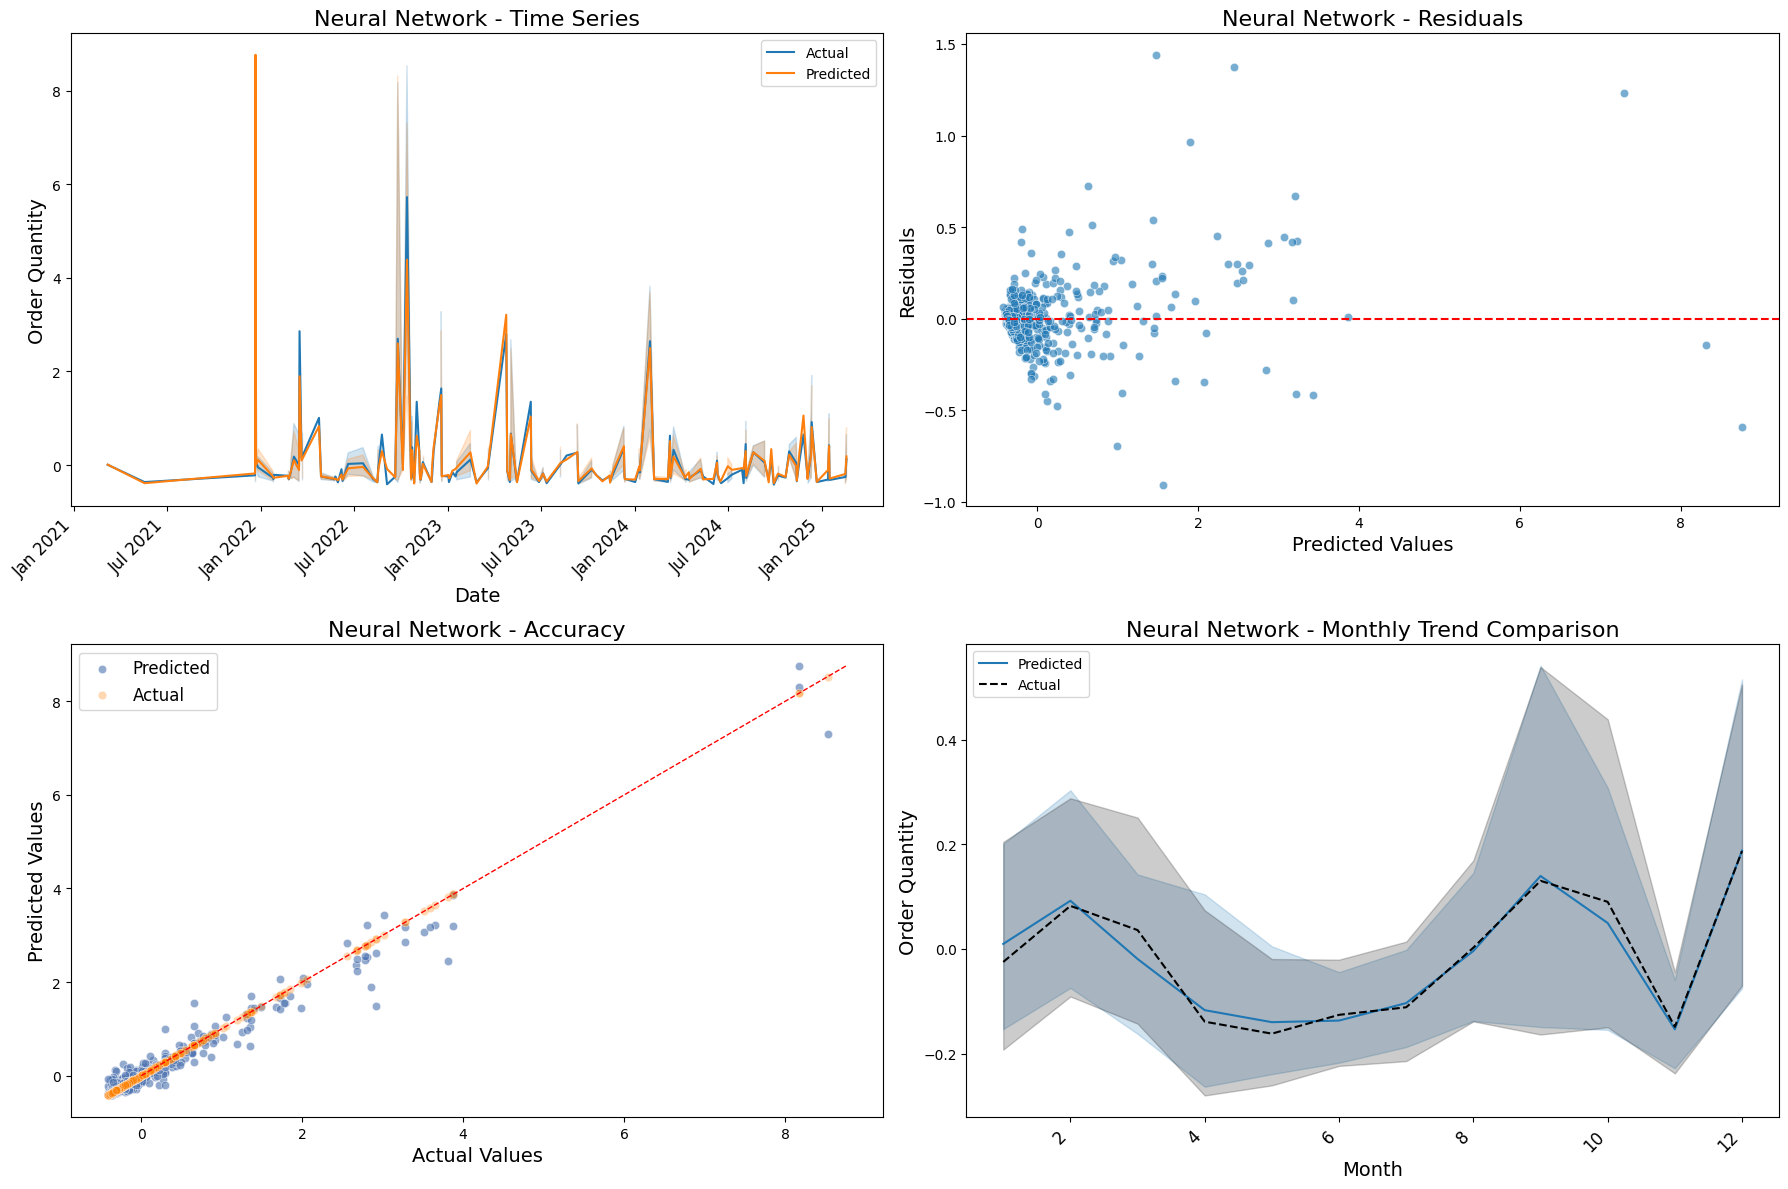

In [17]:
# Create subplots (2 rows, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12)) 
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Time Series Comparison
sns.lineplot(x=plot_dates, y=y_val, label='Actual', ax=axes[0, 0])
sns.lineplot(x=plot_dates, y=y_val_pred, label='Predicted', ax=axes[0, 0])
axes[0, 0].set_title('Neural Network - Time Series', fontsize=16)
axes[0, 0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right', fontsize=12) 
axes[0, 0].set_xlabel('Date', fontsize=14)  
axes[0, 0].set_ylabel('Order Quantity', fontsize=14) 

# Residual Plot
residuals = y_val - y_val_pred
sns.scatterplot(x=y_val_pred, y=residuals, alpha=0.6, ax=axes[0, 1])
axes[0, 1].axhline(0, color='r', linestyle='--')
axes[0, 1].set_title('Neural Network - Residuals', fontsize=16)  
axes[0, 1].set_xlabel('Predicted Values', fontsize=14)  
axes[0, 1].set_ylabel('Residuals', fontsize=14)  

# Actual vs Predicted Scatter Plot
max_val = max(y_val.max(), y_val_pred.max())
sns.scatterplot(x=y_val, y=y_val_pred, color='#4C72B0', alpha=0.6, ax=axes[1, 0], label='Predicted')
sns.scatterplot(x=y_val, y=y_val, color='#ff8000', alpha=0.3, ax=axes[1, 0], label='Actual')  
axes[1, 0].plot([0, max_val], [0, max_val], 'r--', linewidth=1)  # Reference line
axes[1, 0].set_title('Neural Network - Accuracy', fontsize=16)
axes[1, 0].set_xlabel('Actual Values', fontsize=14)
axes[1, 0].set_ylabel('Predicted Values', fontsize=14)  
axes[1, 0].legend(fontsize=12)  

# Monthly Trend Comparison
monthly_data = df.loc[X_val.index, ['order_month']].copy()  # FIXED: Used X_val.index instead of y_val.index
monthly_data['Actual'] = y_val
monthly_data['Predicted'] = y_val_pred

sns.lineplot(x='order_month', y='Predicted', data=monthly_data, label='Predicted', ax=axes[1, 1])
sns.lineplot(x='order_month', y='Actual', data=monthly_data, label='Actual', ax=axes[1, 1], color='black', linestyle='--')
axes[1, 1].set_title('Neural Network - Monthly Trend Comparison', fontsize=16)  
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right', fontsize=12) 
axes[1, 1].set_xlabel('Month', fontsize=14)
axes[1, 1].set_ylabel('Order Quantity', fontsize=14)

plt.tight_layout()
plt.show()


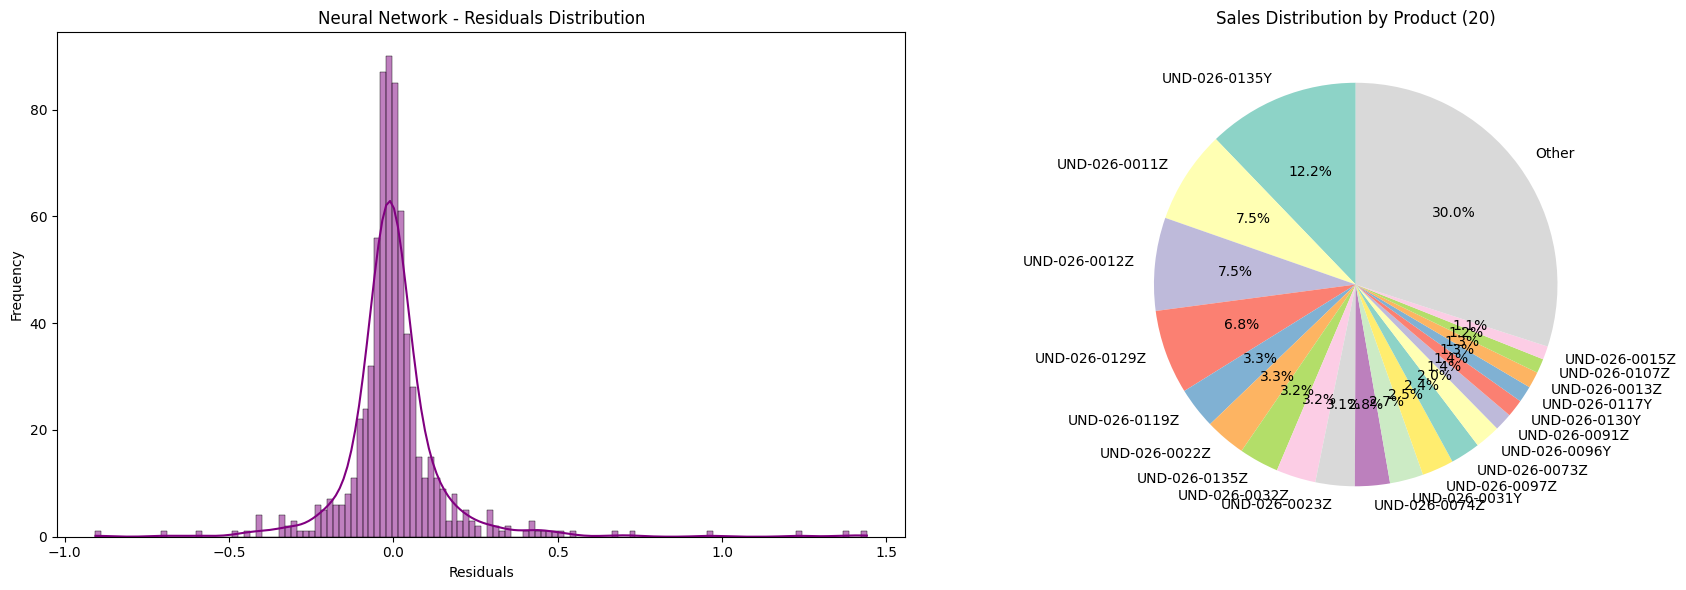

In [18]:
# Create subplots (1 row, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Histogram of Residuals
sns.histplot(residuals, kde=True, color='purple', ax=axes[0])
axes[0].set_title('Neural Network - Residuals Distribution', fontsize=12)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Pie Chart of Product Order Quantity (Top {number} + Other)
product_sales = df.groupby('ProductNumber')['OrderQuantity'].sum()  # Group by product and sum order quantities

# Get the top 20 products by sales
top_products = product_sales.nlargest(20)

# Group the remaining products as 'Other'
other_sales = product_sales.drop(top_products.index).sum()
top_products['Other'] = other_sales

# Plot the pie chart
top_products.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(top_products)))
axes[1].set_title(f'Sales Distribution by Product ({len(top_products) - 1})', fontsize=12)
axes[1].set_ylabel('')  # Hide the y-label for the pie chart

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Ensure 'OrderDate' is in datetime format
df['DetailedOrderDate'] = pd.to_datetime(df['DetailedOrderDate'])

# Create subplots (2 rows, 3 columns: for the new plots)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Increased figure size (18, 10)
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjusted spacing for better plot separation

# --------------------
# 1. Bar Plot: Actual vs. Predicted Order Quantity
# --------------------
axes[0, 0].bar(df.loc[X_val.index, 'DetailedOrderDate'], y_val, label='Actual', alpha=0.6)
axes[0, 0].bar(df.loc[X_val.index, 'DetailedOrderDate'], y_val_pred, label='Predicted', alpha=0.6)
axes[0, 0].set_xlabel('DetailedOrderDate Date', fontsize=14)
axes[0, 0].set_ylabel('Order Quantity', fontsize=14)
axes[0, 0].set_title(f'{custom_ref} Total Products - Actual vs Predicted (Bar Plot)', fontsize=16)
axes[0, 0].set_ylim(min(min(y_val), min(y_val_pred)) * 0.9, max(max(y_val), max(y_val_pred)) * 1.1)  # Adjust based on range
axes[0, 0].legend(fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# --------------------
# 2. Residual Plot
# --------------------
residuals = y_val - y_val_pred
axes[0, 1].scatter(df.loc[X_val.index, 'DetailedOrderDate'], residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('DetailedOrderDate', fontsize=14)
axes[0, 1].set_ylabel('Residuals', fontsize=14)
axes[0, 1].set_title(f'{custom_ref} Total Products - Residual Plot', fontsize=16)
axes[0, 1].tick_params(axis='x', rotation=45)

# --------------------
# 3. Pie Chart: Order Quantity per Month (2024)
# --------------------
order_2024 = df[df['order_year'] == 2024].groupby('order_month')['OrderQuantity'].sum()
axes[0, 2].pie(order_2024, labels=order_2024.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0, 2].set_title(f'{custom_ref} Order Quantity Distribution (2024)', fontsize=16)

# --------------------
# 4. Yearly Trends Comparison (2022, 2023, 2024)
# --------------------
for i, year in enumerate([2022, 2023, 2024]):  
    yearly_df = df[df['order_year'] == year]

    if yearly_df.empty:
        continue  # skip if no data for that year

    # Aggregate OrderQuantity per month
    monthly_actual = yearly_df.groupby('order_month')['OrderQuantity'].sum()

    # Convert y_val_pred to Pandas Series with index from X_val
    pred_series = pd.Series(y_val_pred, index=X_val.index)

    # Group predictions by month
    monthly_predicted = pred_series.groupby(df.loc[X_val.index, 'order_month']).sum()

    # Sort for proper plotting
    monthly_actual = monthly_actual.sort_index()
    monthly_predicted = monthly_predicted.reindex(monthly_actual.index)  # Ensure same months

    # Plot actual and predicted values for the year
    axes[1, i].plot(monthly_actual.index, monthly_actual, label='Actual', alpha=0.6, marker='o', linestyle='-')
    axes[1, i].plot(monthly_predicted.index, monthly_predicted, label='Predicted', alpha=0.6, marker='x', linestyle='--')

    axes[1, i].set_xlabel('Month', fontsize=14)
    axes[1, i].set_ylabel('Order Quantity', fontsize=14)
    axes[1, i].set_title(f'{custom_ref} {year} Total Products - Actual vs Predicted', fontsize=16)
    axes[1, i].set_ylim(0, max(monthly_actual.max(), monthly_predicted.max()) * 1.1)  # Scale Y axis
    axes[1, i].legend(fontsize=12)
    axes[1, i].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


KeyError: 'OrderDate'